퍼셉트론  
: 클래스 확률 제공하지 않고, 고정된 임곗값 기준으로 예측  


- 퍼셉트론 수렴이론 : 훈련 샘플이 선형적으로 구분될 수 있다면, 알고리즘이 정답에 수렴

In [143]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # 꽃잎의 길이와 너비
y = (iris.target == 0).astype(np.int64)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1], dtype=int64)

#### 분류용 다층 퍼셉트론

In [144]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [145]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [146]:
# 검증셋 만들기, 0~1범위로 조정
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [147]:
class_names = ["T-shirt/top", "Trouser", "PuUover", "Dress", "Coat", 
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [148]:
class_names[y_train[0]]

'Coat'

In [149]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) # 입력이미지를 1차원 배열로
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [150]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [151]:
model.layers

In [152]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 300)               235500    
                                                                 
 dense_41 (Dense)            (None, 100)               30100     
                                                                 
 dense_42 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [153]:
hidden1 = model.layers[1]
hidden1.name

'dense_40'

In [57]:
model.get_layer(hidden1.name) is hidden1

True

In [58]:
weights, biases = hidden1.get_weights()
weights.shape, biases.shape

((784, 300), (300,))

In [59]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# sparse_categorical_crossentropy : 클래스가 배타적일때 (원핫인코딩 X)
# categorical_crossentropy : 원핫인코딩
# 원핫인코딩으로 변환하려면, keras.utils.to_categorical()
# 원핫인코딩 -> 원핫인코딩 X : np.argmax(axis=1)

# sgd : 역전파 알고리즘 수행

In [60]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7267 - accuracy: 0.7571 - val_loss: 0.5052 - val_accuracy: 0.8302
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4909 - accuracy: 0.8286 - val_loss: 0.4481 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4459 - accuracy: 0.8426 - val_loss: 0.4272 - val_accuracy: 0.8574
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4180 - accuracy: 0.8527 - val_loss: 0.4110 - val_accuracy: 0.8600
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3988 - accuracy: 0.8595 - val_loss: 0.3872 - val_accuracy: 0.8676
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3819 - accuracy: 0.8666 - val_loss: 0.4243 - val_accuracy: 0.8548
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3706 - accuracy: 0.8685 - val_loss: 0.3655 - val_accuracy:

In [61]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [62]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

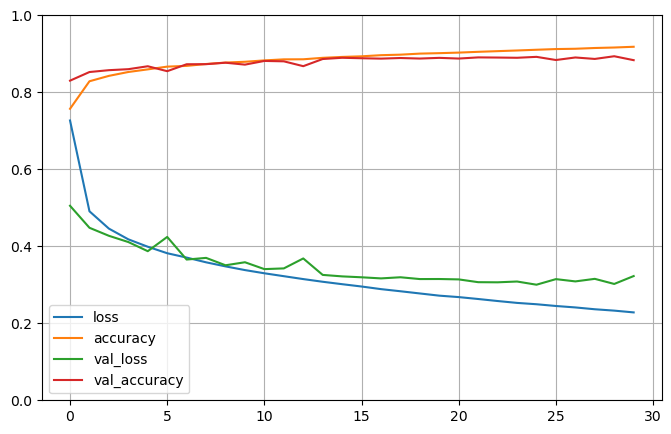

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # 수직축 범위 0-1 사이
plt.show()

In [64]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3518 - accuracy: 0.8719


[0.3517570197582245, 0.8719000220298767]

In [65]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 58ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.94],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [66]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 22ms/step


array([9, 2, 1], dtype=int64)

In [67]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'PuUover', 'Trouser'], dtype='<U11')

In [68]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

#### 회귀용 다층 퍼셉트론

In [154]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_valid = ss.transform(X_valid)
X_test = ss.transform(X_test)

In [155]:
# 잡음이 많은 데이터셋 -> 과대적합 막는 용도로 뉴런수가 적은 은닉층 하나 사용
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.1226 - val_loss: 13.3747
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3591 - val_loss: 0.5932
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4712 - val_loss: 0.4338
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4232 - val_loss: 0.4025
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4016 - val_loss: 0.3939
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3887 - val_loss: 0.3930
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3802 - val_loss: 0.3773
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3712 - val_loss: 0.3689
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3651 - val_loss: 0.4495
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3655 - val_loss: 0.384

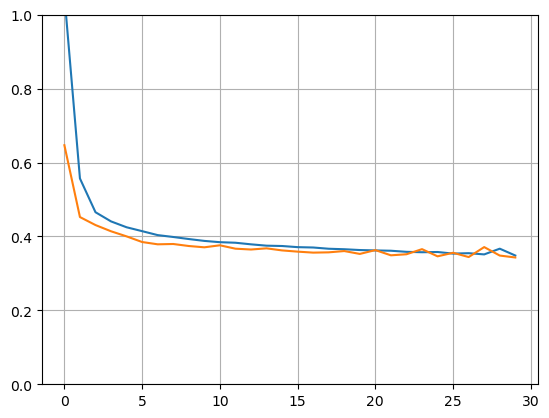

In [75]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [76]:
y_pred

array([[2.684791 ],
       [0.972912 ],
       [1.4379727]], dtype=float32)

In [77]:
y_test[:3]

array([4.417, 0.751, 1.618])

#### 함수형 API

In [78]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [79]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_14 (Dense)            (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_15 (Dense)            (None, 30)                   930       ['dense_14[0][0]']            
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_15[0][0]']        

In [80]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.1906 - val_loss: 0.7216
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7629 - val_loss: 0.6355
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6637 - val_loss: 0.6071
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6258 - val_loss: 0.5702
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5955 - val_loss: 0.5497
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5708 - val_loss: 0.5347
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5501 - val_loss: 0.5179
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5328 - val_loss: 0.5008
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5183 - val_loss: 0.4917
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5062 - val_loss: 0.4855

In [81]:
# 일부 특성은 짧은 경로로 전달, 다른 특성들은 깊은 경로로 전달 -> 여러 입력 사용
input_A = keras.layers.Input(shape=[5], name='wide_input') # 특성 인덱스 0~4까지 5개 특성을 짧은 경로로
input_B = keras.layers.Input(shape=[6], name='deep_input') # 특성 인덱스 2~7까지 6개 특성은 깊은 경로로
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [82]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 deep_input (InputLayer)     [(None, 6)]                  0         []                            
                                                                                                  
 dense_17 (Dense)            (None, 30)                   210       ['deep_input[0][0]']          
                                                                                                  
 wide_input (InputLayer)     [(None, 5)]                  0         []                            
                                                                                                  
 dense_18 (Dense)            (None, 30)                   930       ['dense_17[0][0]']            
                                                                                            

In [83]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.9212 - val_loss: 1.0169
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8445 - val_loss: 0.6591
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6890 - val_loss: 0.6155
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6519 - val_loss: 0.5888
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6287 - val_loss: 0.5706
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6099 - val_loss: 0.5574
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5932 - val_loss: 0.5429
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5771 - val_loss: 0.5349
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5620 - val_loss: 0.5186
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5492 - val_loss: 0.5102

In [84]:
# 보조출력 추가 : 규제로만 사용
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)

aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [85]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [86]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                   validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8677 - main_output_loss: 0.7915 - aux_output_loss: 1.5532 - val_loss: 0.5727 - val_main_output_loss: 0.5229 - val_aux_output_loss: 1.0208
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5628 - main_output_loss: 0.5155 - aux_output_loss: 0.9884 - val_loss: 0.4899 - val_main_output_loss: 0.4510 - val_aux_output_loss: 0.8399
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5162 - main_output_loss: 0.4791 - aux_output_loss: 0.8508 - val_loss: 0.4683 - val_main_output_loss: 0.4387 - val_aux_output_loss: 0.7352
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4767 - main_output_loss: 0.4447 - aux_output_loss: 0.7648 - val_loss: 0.4434 - val_main_output_loss: 0.4188 - val_aux_output_loss: 0.6644
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4653 - main_output_loss: 0.4385 - aux_output_loss: 0.7067 - val_loss

In [87]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test,y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 66ms/step


In [88]:
y_pred_main, y_pred_aux

(array([[2.9056575],
        [1.2779408],
        [1.3825278]], dtype=float32),
 array([[3.0614839],
        [1.715307 ],
        [1.404968 ]], dtype=float32))

#### 서브클래싱 API로 동적 모델 만들기

In [89]:
class WideAndDeepModel(keras.Model) :
    def __init__(self, units=30, activation='relu', **kwargs) :
        super().__init__(**kwargs)  # 표준 매개변수 처리
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs) :
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

#### 모델 저장과 복원

In [156]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.7295 - val_loss: 0.8410
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7914 - val_loss: 0.7305
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7210 - val_loss: 0.6765
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6736 - val_loss: 0.6353
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6345 - val_loss: 0.6026
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6010 - val_loss: 0.5734
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5714 - val_loss: 0.5476
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5451 - val_loss: 0.5267
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5230 - val_loss: 0.5079
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.5278


In [160]:
model.save("my_keras_model.h5")

In [162]:
model = keras.models.load_model("my_keras_model.h5")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfc in position 27: invalid start byte

In [104]:
model.predict(X_new)

1/1 [==============================] - 0s 63ms/step


array([[2.5035272],
       [1.2643925],
       [1.494921 ]], dtype=float32)

In [105]:
model.save_weights("my_keras_weights.ckpt") # 모델 파라미터 저장

In [106]:
model.load_weights("my_keras_weights.ckpt")

#### 콜백 사용하기  
: 훈련 도중 일정 간격으로 체크포인트 저장  
: 일정 에포크동안 검증 세트에 대한 점수 향상되지 않으면 훈련 멈춤

In [110]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True) # 훈련동안 검증 세트 사용함, 최상의 검증 세트 점수에서만 모델 저장
history = model.fit(X_train, y_train, epochs=10, validation_data = (X_valid, y_valid), callbacks=[checkpoint_cb])
model = keras.models.load_model('my_keras_model.h5') # 최상의 모델로 복원

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4060 - val_loss: 0.3926
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4036 - val_loss: 0.3895
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4013 - val_loss: 0.3896
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3990 - val_loss: 0.3846
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3968 - val_loss: 0.3832
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3948 - val_loss: 0.3813
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3930 - val_loss: 0.3809
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3909 - val_loss: 0.3785
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3892 - val_loss: 0.3774
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3872 - val_loss: 0.3769

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfc in position 27: invalid start byte

In [113]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data = (X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])
# 최상의 가중치를 복원하기에 저장된 모델을 따로 복원할 필요 없음

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3718 - val_loss: 0.3619
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3704 - val_loss: 0.3614
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3695 - val_loss: 0.3607
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3683 - val_loss: 0.3603
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3673 - val_loss: 0.3581
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3662 - val_loss: 0.3593
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3655 - val_loss: 0.3571
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3643 - val_loss: 0.3576
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3636 - val_loss: 0.3570
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3625 - val_lo

신경망 하이퍼파라미터 튜닝

In [141]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]) :
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape = input_shape))
    for layer in range(n_hidden) :
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate = learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [127]:
from keras.wrappers.scikit_learn import KerasRegressor
keras_reg = KerasRegressor(build_model)

ModuleNotFoundError: No module named 'keras.wrappers'

In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
mse_test = keras_reg.score(X_test, y_test)

In [ ]:
# 랜덤탐색
from scipy.stats import reciprocal # 역수
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_hidden' : [0,1,2,3],
    'n_neurons' : np.arange(1,100)
    'learning_rate' : reciprocal(3e-4, 3e-2)
}

rnd = RandomizedSearchCV(keras.reg, param_distribs, n_iter=10, cv=3)
rnd.fit(X_train, y_train, epochs=100, validation_data=(X_valid,y_valid),
       callbacks=[keras.callbacks.EarlyStopping(patience=10)])
# RandomizedSearchCV는 k-겹 교차검증하기에 X_valid, y_valid 사용 X -> 이는 조기종료에만 사용됨

In [ ]:
rnd.best_params_

In [ ]:
rnd.best_score_

In [ ]:
rnd.score(X_test, y_test)

In [ ]:
model = rnd.best_estimator_.model
model

In [ ]:
model.evaluate(X_test, y_test)

# 연습문제

In [128]:
# 10) 심층 다층퍼셉트론을 MNIST에 훈련해보기
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

11490434/11490434 [==============================] - 2s 0us/step


In [129]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [130]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [131]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [132]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 7s 4ms/step - loss: 754005312.0000 - accuracy: 0.5991 - val_loss: 2.3388 - val_accuracy: 0.0976


Text(0, 0.5, 'Loss')

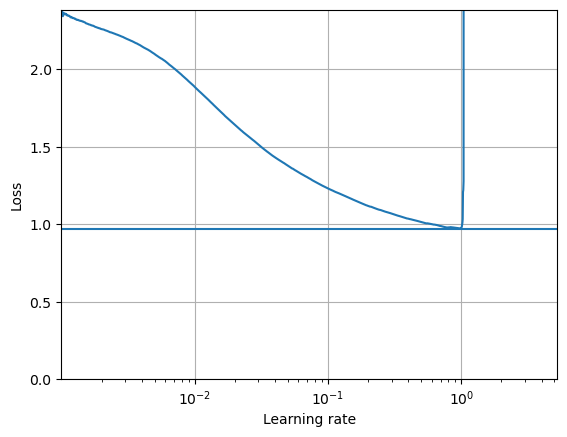

In [133]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [134]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [135]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [139]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2285 - accuracy: 0.9281 - val_loss: 0.1099 - val_accuracy: 0.9678
Epoch 2/100
  51/1719 [..............................] - ETA: 5s - loss: 0.1177 - accuracy: 0.9681

C:\Users\knuyh\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1719/1719 [==============================] - 5s 3ms/step - loss: 0.0974 - accuracy: 0.9703 - val_loss: 0.0873 - val_accuracy: 0.9746
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0642 - accuracy: 0.9799 - val_loss: 0.0834 - val_accuracy: 0.9754
Epoch 4/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0457 - accuracy: 0.9858 - val_loss: 0.0732 - val_accuracy: 0.9798
Epoch 5/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0363 - accuracy: 0.9883 - val_loss: 0.0752 - val_accuracy: 0.9810
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0288 - accuracy: 0.9905 - val_loss: 0.0811 - val_accuracy: 0.9822
Epoch 7/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.0801 - val_accuracy: 0.9802
Epoch 8/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0157 - accuracy: 0.9949 - val_loss: 0.1009 - val_accuracy: 0.97

In [140]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0849 - accuracy: 0.9857


[0.08486758172512054, 0.9857000112533569]